<a href="https://colab.research.google.com/github/krakowiakpawel9/uczenie_maszynowe/blob/master/decision_trees/classification/08_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Churn Problem

### Import bibliotek

In [0]:
import pandas as pd
import numpy as np

### Pobranie danych

In [0]:
%%bash
wget -q https://ml-repository-krakers.s3-eu-west-1.amazonaws.com/decision_tree_course/datasets/churn.csv

### Wczytanie danych

In [3]:
df = pd.read_csv('churn.csv')
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### Wyświetlenie podstawowych statystyk

In [4]:
df.describe().apply(lambda x: round(x, 2))

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


### Sprawdzenie czy są brakujące wartości

In [5]:
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

### Informacje o zbiorze

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

### Ręczny wybór zmiennych

In [7]:
available_vars = list(df.columns)
for var in available_vars:
    print(var)

state
account length
area code
phone number
international plan
voice mail plan
number vmail messages
total day minutes
total day calls
total day charge
total eve minutes
total eve calls
total eve charge
total night minutes
total night calls
total night charge
total intl minutes
total intl calls
total intl charge
customer service calls
churn


### Ekstrakcja zmiennych objaśniających (predyktorów) i zmiennej objaśnianej (zmiennej prognozowanej)

In [0]:
selected_vars = ['account length', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls',
                'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
                'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']
df_selected = df[selected_vars]

In [0]:
X = df_selected[df_selected.columns[:-1]]
y = df_selected.churn

### Dummy variables

In [20]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_yes,voice mail plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

X_train shape: (2499, 17)
X_test shape: (834, 17)
y_train shape: (2499,)
y_test shape: (834,)


In [22]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=3)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Utworzenie grafu drzewa

In [0]:
from sklearn.tree import export_graphviz

export_graphviz(tree,
               out_file='graph.dot',
               feature_names=X.columns,
               class_names=['churn', 'non-churn'],
               rounded=True,
               filled=True)

In [0]:
%%bash
dot -Tpng graph.dot -o graph.png

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


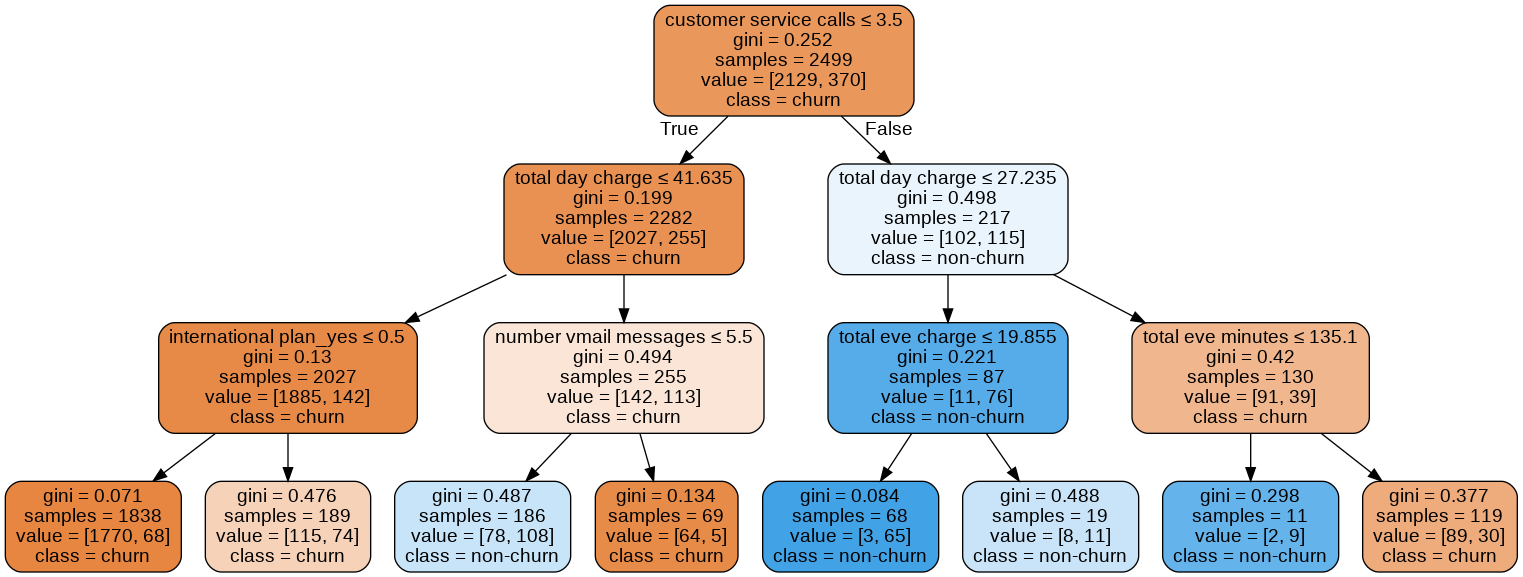

In [25]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['churn', 'non-churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('churn.png')
Image(graph.create_png())

### Grid Search - przeszukiwanie siatki parametrów

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'max_depth': [1, 2, 3, 4, 5, 6, 7],
               'min_samples_leaf': [1, 5, 10, 20, 50],
               'criterion': ['gini', 'entropy']}]

gs = GridSearchCV(tree, param_grid=param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

print('Najlepsza dokładnośc:', gs.best_score_)
print('Najlepsze parametry modelu', gs.best_params_)

model = gs.best_estimator_

Najlepsza dokładnośc: 0.9399759903961584
Najlepsze parametry modelu {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 5}


In [27]:
model = gs.best_estimator_
model.score(X_test, y_test)

0.9436450839328537

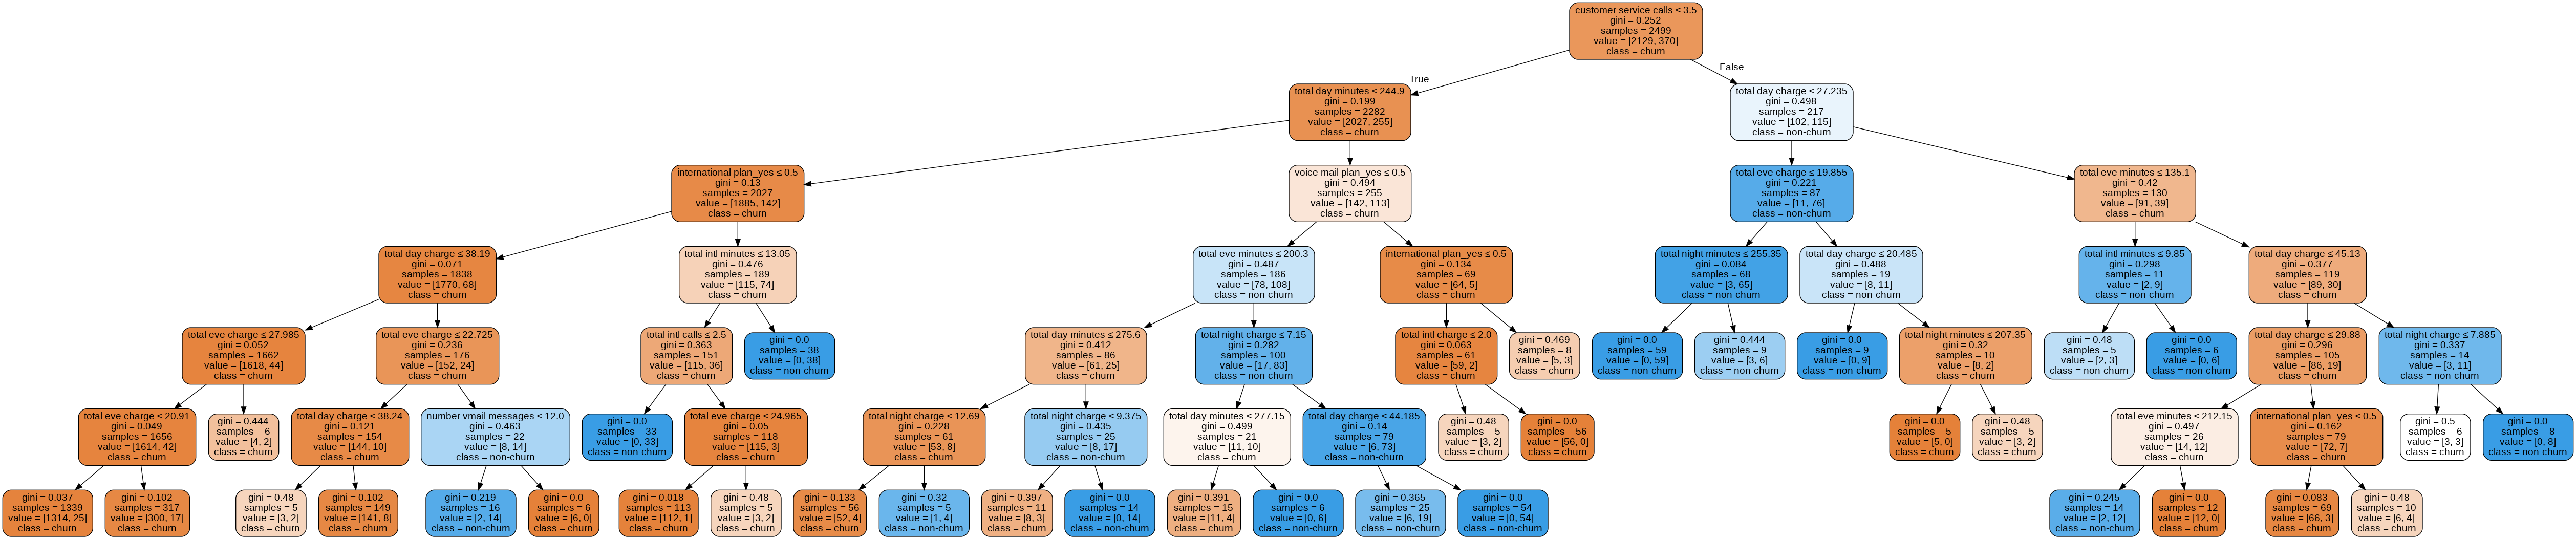

In [28]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
               filled=True, rounded=True,
               special_characters=True,
               feature_names=X.columns,
               class_names=['churn', 'non-churn'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('churn.png')
Image(graph.create_png())

In [29]:
model.classes_

array([False,  True])

In [35]:
model.get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}